Install ahijevyc/MetPy branch parcel_with_virtual_temperature. [link](https://github.com/ahijevyc/MetPy/tree/parcel_with_virtual_temperature)
* handles missing dewpoints (water vapor pressure=0, mixing ratio=0, Tv=T)

In [1]:
import logging

import cm1.input.era5
import cm1.input.sounding
import matplotlib.pyplot as plt
import pandas as pd
from cm1.skewt import skewt
from cm1.utils import TMPDIR
from metpy.units import units

# Configure logging
logging.basicConfig(
    level=logging.WARNING, format="%(asctime)s - %(levelname)s: %(message)s", force=True
)

### Predefined CM1 input soundings

2025-06-09 16:24:15,704 - WARNING: ignoring input Tv. Derive from T, qv(p,Td(p,Q))
2025-06-09 16:24:15,712 - WARNING: no 'time' variable in sounding
2025-06-09 16:24:15,802 - WARNING: ignoring input Tv. Derive from T, qv(p,Td(p,Q))
2025-06-09 16:24:15,809 - WARNING: no 'time' variable in sounding
2025-06-09 16:24:15,857 - WARNING: ignoring input Tv. Derive from T, qv(p,Td(p,Q))
2025-06-09 16:24:15,864 - WARNING: no 'time' variable in sounding
2025-06-09 16:24:15,900 - WARNING: lcl outside range of p 30.3 hPa 946.1 hPa
2025-06-09 16:24:15,907 - WARNING: ignoring input Tv. Derive from T, qv(p,Td(p,Q))
2025-06-09 16:24:15,913 - WARNING: no 'time' variable in sounding
2025-06-09 16:24:15,952 - WARNING: ignoring input Tv. Derive from T, qv(p,Td(p,Q))
2025-06-09 16:24:15,958 - WARNING: no 'time' variable in sounding
2025-06-09 16:24:16,033 - WARNING: ignoring input Tv. Derive from T, qv(p,Td(p,Q))
2025-06-09 16:24:16,044 - WARNING: no 'time' variable in sounding
2025-06-09 16:24:16,158 - WAR

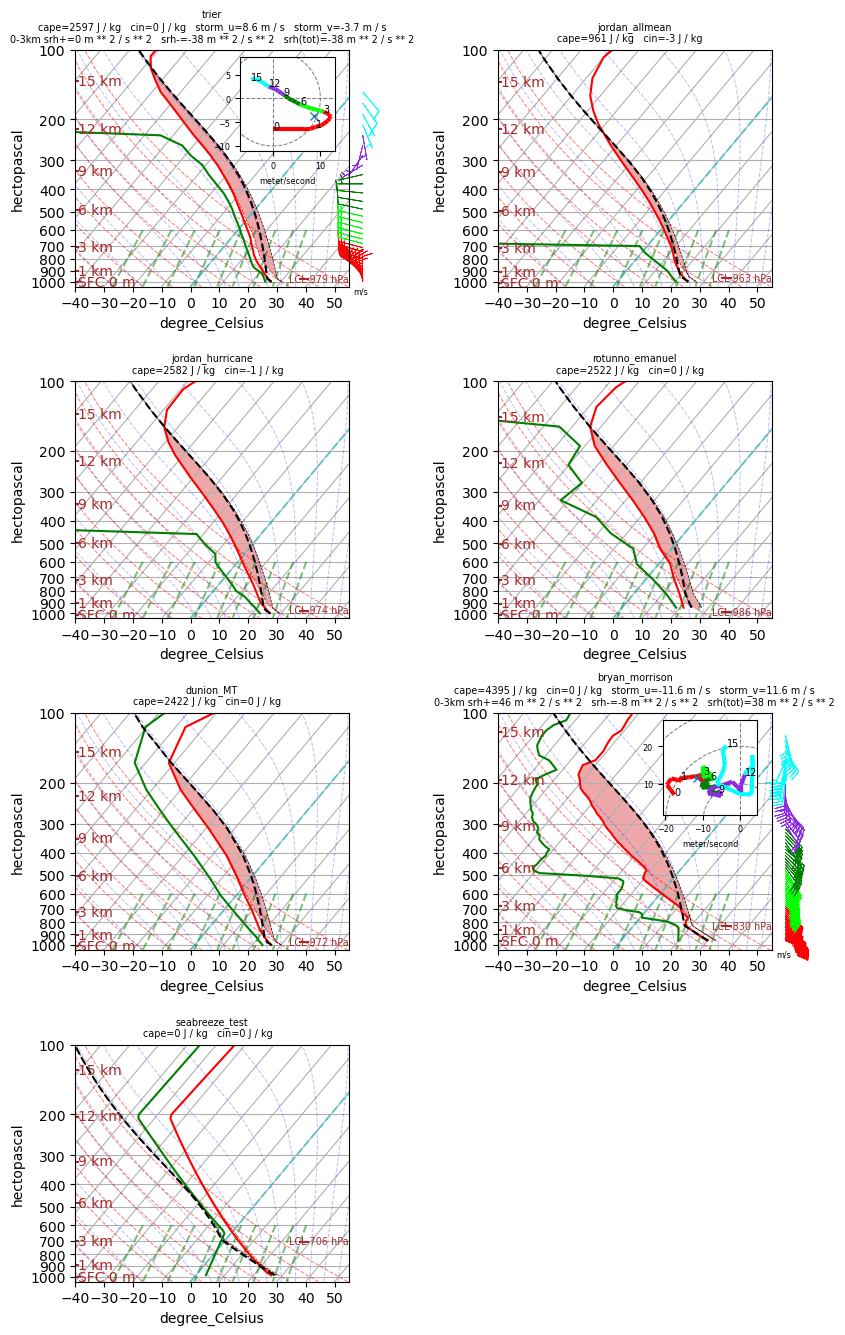

In [2]:
dss = [
    cm1.input.sounding.trier(),
    cm1.input.sounding.jordan_allmean(),
    cm1.input.sounding.jordan_hurricane(),
    cm1.input.sounding.rotunno_emanuel(),
    cm1.input.sounding.dunion_MT(),
    cm1.input.sounding.bryan_morrison(),
    cm1.input.sounding.seabreeze_test(),
]
fig, axes = plt.subplots(
    ncols=2,
    nrows=4,
    sharex=True,
    sharey=True,
    figsize=(10, 16),
    gridspec_kw={"hspace": 0.4},
)
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")

for i, ds in enumerate(dss):
    # Use subplot because skewt() uses metpy.plots.SkewT, which uses it.
    logging.info(ds.attrs["case"])
    skew = skewt(ds, fig=fig, subplot=(4, 2, i + 1))
    skew.ax.set_title(
        ds.attrs["case"] + skew.ax.get_title(), fontsize="x-small"
    )  # Set title to sounding case

In [3]:
valid_time = pd.to_datetime("20240525")
lon = -95 * units.degree_E
lat = 33 * units.degree_N
ds_aws = cm1.input.sounding.era5_aws(valid_time, lat, lon)
ds_aws

2025-06-09 16:24:16,906 - WARNING: Found cached s3 128_133_q.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:16,907 - WARNING: Found cached s3 128_130_t.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:16,907 - WARNING: Found cached s3 128_131_u.ll025uv 2024-05-25 00:00:00
2025-06-09 16:24:16,908 - WARNING: Found cached s3 128_132_v.ll025uv 2024-05-25 00:00:00
2025-06-09 16:24:16,908 - WARNING: Found cached s3 128_135_w.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:16,909 - WARNING: Found cached s3 128_129_z.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:16,994 - WARNING: Found cached s3 128_134_sp.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:16,995 - WARNING: Found cached s3 128_165_10u.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:16,995 - WARNING: Found cached s3 128_166_10v.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:16,995 - WARNING: Found cached s3 128_167_2t.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:16,995 - WARNING: Found cached s3 128_168_2d.ll025sc 2024-05-25 00:00:00
2025-06-09 16:

<xarray.Dataset> Size: 2kB
Dimensions:                        (level: 37)
Coordinates:
    longitude                      float64 8B 265.0
    latitude                       float64 8B 33.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/29)
    Q                              (level) float32 148B <Quantity(dask.array<...
    T                              (level) float32 148B <Quantity(dask.array<...
    U                              (level) float32 148B <Quantity(dask.array<...
    V                              (level) float32 148B <Quantity(dask.array<...
    W                              (level) float32 148B <Quantity(dask.array<...
    Z                              (level) float32 148B <Quantity(dask.array<...
    ...                             ...
    ISOR                           float32 4B <Quantity(dask.array<getitem, s...
    ANOR                           float32 4B <Quantity(dask.array<getitem, s...
    SLOR                           float32 4B <Quantity(dask.array<getitem, s...
    LSM                            float32 4B <Quantity(dask.array<getitem, s...
    DL                             float32 4B <Quantity(dask.array<getitem, s...
    surface_geopotential_height    float32 4B <Quantity(dask.array<getitem, s...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc41 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Sun 04 Aug 2024 04:21:22 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug  4 16:21:38 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

### Given a latitude and longitude, select a 3x3 grid (nearest ERA5 grid point + 8 neighbors)

2025-06-09 16:24:17,093 - WARNING: Found cached s3 128_133_q.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:17,094 - WARNING: Found cached s3 128_130_t.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:17,094 - WARNING: Found cached s3 128_131_u.ll025uv 2024-05-25 00:00:00
2025-06-09 16:24:17,094 - WARNING: Found cached s3 128_132_v.ll025uv 2024-05-25 00:00:00
2025-06-09 16:24:17,095 - WARNING: Found cached s3 128_135_w.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:17,095 - WARNING: Found cached s3 128_129_z.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:17,139 - WARNING: Found cached s3 128_134_sp.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:17,140 - WARNING: Found cached s3 128_165_10u.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:17,140 - WARNING: Found cached s3 128_166_10v.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:17,140 - WARNING: Found cached s3 128_167_2t.ll025sc 2024-05-25 00:00:00
2025-06-09 16:24:17,141 - WARNING: Found cached s3 128_168_2d.ll025sc 2024-05-25 00:00:00
2025-06-09 16:

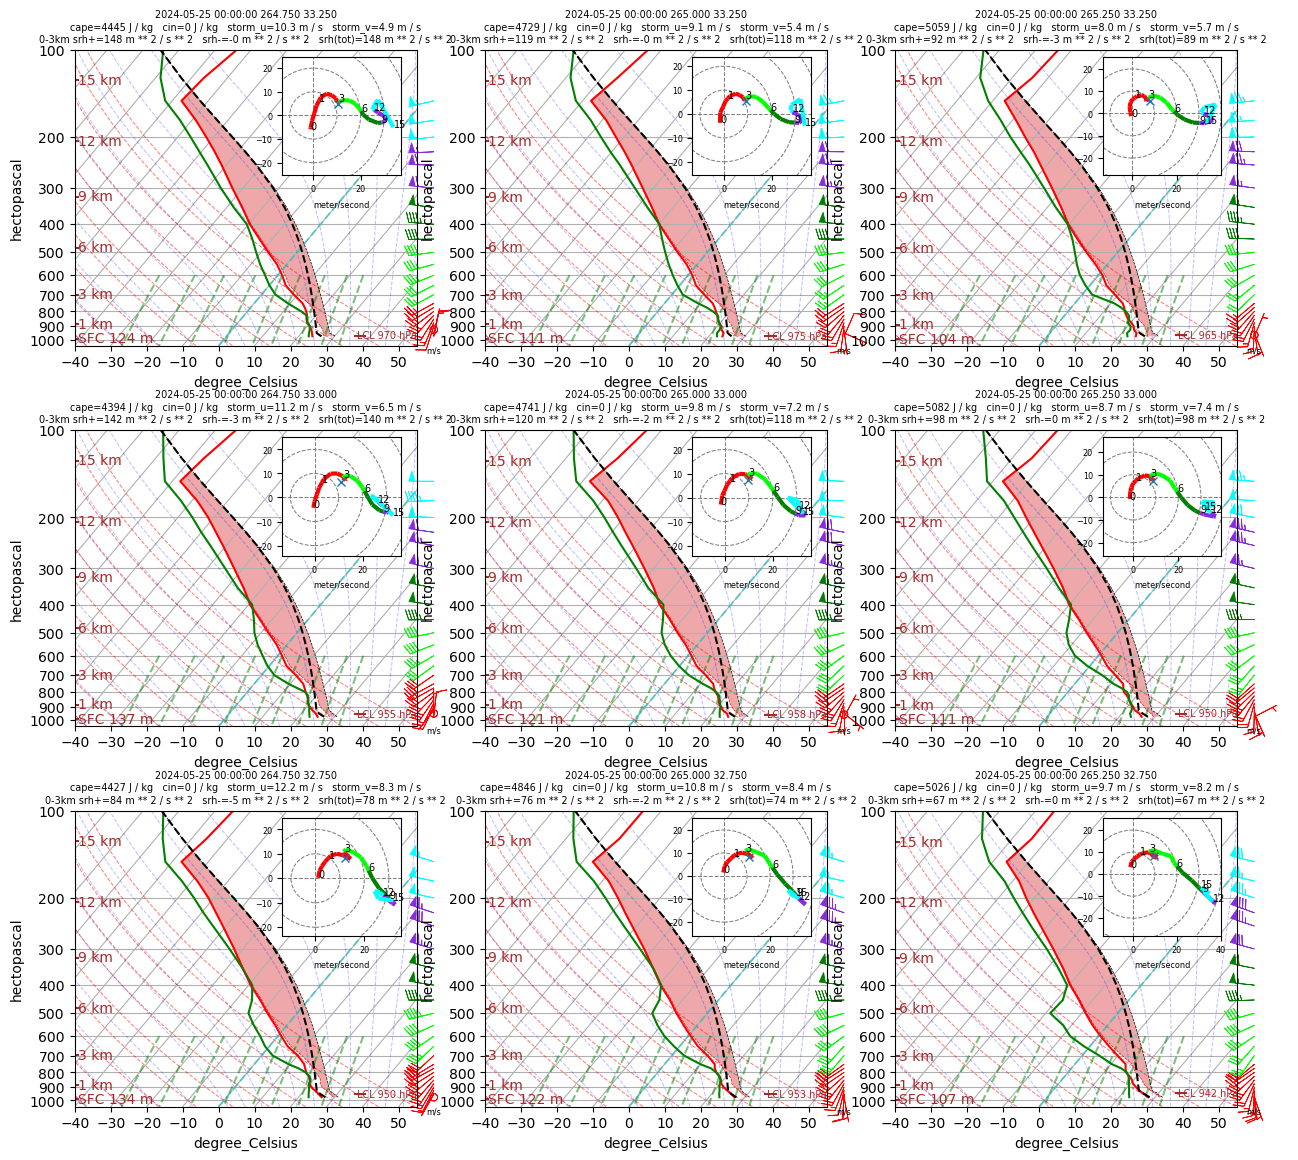

In [4]:
#ds0 = cm1.input.era5.model_level(valid_time).load()
ds0 = cm1.input.era5.aws(valid_time)

# Use scalar values for lat/lon to select the central grid point
sel = cm1.input.era5.nearest_grid_block_sel(ds0, lat=lat, lon=lon)
ds0 = ds0.sel(sel)

fig, axes = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(15, 14))
# Hide the axes for all subplots
for i, ax in enumerate(axes.flat):
    ax.axis("off")
    ds = ds0.stack(i=("latitude", "longitude")).isel(i=i)
    skew = skewt(ds, fig=fig, subplot=(3, 3, i+1))
    skew.ax.set_title(f"{skew.ax.get_title()}", fontsize="x-small")
    ofile = TMPDIR / f"{skew.ax.get_title().split('\n')[0].replace(' ','_')}.txt"
    with open(ofile, "w") as fh:
        fh.write(cm1.input.sounding.to_txt(ds))
        logging.warning(ofile)

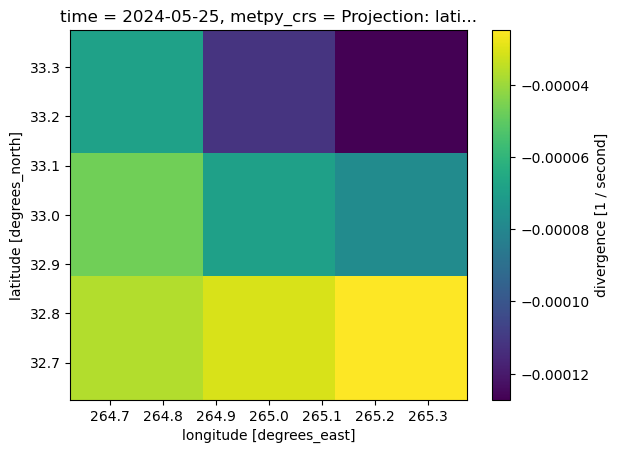

In [5]:
import metpy.calc as mpcalc

ds = ds0
# Attach MetPy parsing (to interpret units and coordinates)
ds = ds.metpy.parse_cf()

# Get wind components (assumes they are in m/s and with coordinates parsed)
u = ds['U'].metpy.sel(level=850 * units.hPa)  # or any other level
v = ds['V'].metpy.sel(level=850 * units.hPa)

# Grid spacing (assumes 1D lat/lon)
dx, dy = mpcalc.lat_lon_grid_deltas( ds['longitude'], ds['latitude'])

# Compute divergence (returns units of 1/s)
div = mpcalc.divergence(u, v, dx=dx, dy=dy)
# `div` is a 2D array (latitude x longitude) at the selected level
ds['divergence'] = (('latitude', 'longitude'), div.data)
ds['divergence'].plot()

In [6]:
cm1.input.era5.pressure_level(valid_time).load()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/glade/campaign/collections/rda/data/d633000/e5.oper.an.pl/202405/e5.oper.an.pl.128_129_z.ll025sc.2024052500_2024052523.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
ds0.LSM.plot()

In [ ]:
from io import StringIO

s = cm1.input.sounding.to_txt(dss["G"])
print(s)
pd.read_csv(StringIO(s), skiprows=1, sep=" ", names=["Z", "theta", "Q", "U", "V"])

## Show difference between pressure-level and model level soundings
* fewer pressure levels than model levels
* winds at surface (10u and 10v) not in pressure-level sounding

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(14, 7))
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")
skew = skewt(ds_aws, fig=fig, subplot=(1, 2, 1))
skew.ax.set_title(f"ERA5 AWS pressure level  {skew.ax.get_title()}", fontsize="x-small")
skew = skewt(ds0.isel(isel["G"]), fig=fig, subplot=(1, 2, 2))
skew.ax.set_title(f"model level  {skew.ax.get_title()}", fontsize="x-small")

In [ ]:
cm1.input.sounding.to_txt(ds_aws)

In [ ]:
ds = cm1.input.sounding.era5_pressure_level(valid_time, lat, lon)
ds

In [ ]:
skewt(ds)